# Visualization Notebook

In this notebook we explore the dataset and interpret the customer base information that was cleaned in the EDA notebook. 

In [61]:
#Importing necessary functions for creating graphs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
df=pd.read_csv("clean_customer_df.csv",index_col="Unnamed: 0")

In [3]:
df

,cit,zip_code,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,device_protection,tech_support,paperless_billing,monthly_charges,churn_value,churn_score,cltv,satisfaction_score,customer_status,churn_score.1,churn_categor,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,number_of_dependents,tel_internet_service,tel_online_securit,tel_online_backup,tel_multiple_lines,tel_streaming_tv,tel_payment_method,tel_total_charges,tel_contract,tel_streaming_movies,tel_churn_reason
0,Los Angeles,90003,33.964131,-118.272783,Male,0,0,0,2,1,0,0,1,53.85,1,86,3239,1,Churned,86,Competitor,0,0,2,None,10.47,DSL,21,0,0,0,1,0.00,0,20.94,129.09,30,0,0,1,1,1,0,0,Credit Card,108.15,Month-to-Month,0,Competition Offers
1,Los Angeles,90005,34.059281,-118.307420,Female,0,0,1,2,1,0,0,1,70.70,1,67,2701,2,Churned,67,Other,0,0,2,None,9.12,Fiber Optic,51,0,0,0,1,0.00,0,18.24,169.89,10,1,2,1,0,0,0,0,Bank Withdrawal,151.65,Month-to-Month,0,External Factors
2,Los Angeles,90006,34.048013,-118.293953,Female,0,0,1,8,1,1,0,1,99.65,1,86,5372,3,Churned,86,Other,0,0,8,None,12.15,Cable,26,1,0,1,1,0.00,0,97.20,917.70,30,0,2,1,0,0,1,1,Bank Withdrawal,820.50,Month-to-Month,1,External Factors
3,Los Angeles,90010,34.062125,-118.315709,Female,0,1,1,28,1,1,1,1,104.80,1,84,5003,3,Churned,84,Other,0,0,28,Offer C,4.89,Fiber Optic,47,1,1,1,1,0.00,0,136.92,3182.97,20,1,3,1,0,0,1,1,Bank Withdrawal,3046.05,Month-to-Month,1,External Factors
4,Los Angeles,90015,34.039224,-118.266293,Male,0,0,1,49,1,1,0,1,103.70,1,89,5340,1,Churned,89,Competitor,0,0,49,None,44.33,Fiber Optic,11,1,0,1,1,0.00,0,2172.17,7208.47,30,0,1,1,0,1,1,1,Bank Withdrawal,5036.30,Month-to-Month,1,Competition Offers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,0,0,0,72,1,0,0,1,21.15,0,45,5306,5,Stayed,45,Not Churned,0,0,72,None,22.77,None,0,0,0,0,0,19.31,0,1639.44,3039.53,20,0,0,0,0,0,0,0,Bank Withdrawal,1419.40,Two Year,0,Did Not Churn
7039,Adelanto,92301,34.667815,-117.536183,Male,0,1,1,24,1,1,1,1,84.80,0,59,2140,3,Stayed,59,Not Churned,1,1,24,Offer C,36.05,Cable,24,1,1,1,1,48.23,0,865.20,2807.47,30,0,2,1,1,0,1,1,Mailed Check,1990.50,One Year,1,Did Not Churn
7040,Amboy,92304,34.559882,-115.637164,Female,0,1,1,72,1,1,0,1,103.20,0,71,5560,4,Stayed,71,Not Churned,1,4,72,None,29.66,Fiber Optic,59,1,0,1,1,45.38,0,2135.52,9453.04,20,0,2,1,0,1,1,1,Credit Card,7362.90,One Year,1,Did Not Churn
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,0,1,1,11,0,0,0,1,29.60,0,59,2793,4,Stayed,59,Not Churned,1,1,11,None,0.00,DSL,17,0,0,0,1,27.24,0,0.00,319.21,30,0,2,1,1,0,0,0,Bank Withdrawal,346.45,Month-to-Month,0,Did Not Churn


In [4]:
def percentage_col(df,column,string=False, churn= False):
    """
    This function takes in a dataframe, column and returns the percentage of each row respective to its churn value.
    If the column's percentage is not based on its churned value it will just calculate the percent per column.
    If the column is based on its churn value it will calculate the percentage per churn value. This will also turn
    the column from binary to Yes or No.
    """
    if churn== True:
        values=[]
        for i in df.index:
            if df.churn_value[i]==1:

                summ=df[df.churn_value==1][column].sum()
                values.append(round((df[column][i] * 100)/summ,2))

            else:

                summ=df[df.churn_value==0][column].sum()
                values.append(round((df[column][i] * 100)/summ,2))
    else:
        values=[]
        for i in df.index:
            summ=df[column].sum()
            values.append(round((df[column][i] * 100)/summ,2))      

                
    if string== True:        
        for i in df.index:  
            if df.churn_value[i]==1:
                df.churn_value[i]= "Yes"
            else:
                df.churn_value[i]= "No"
    return values

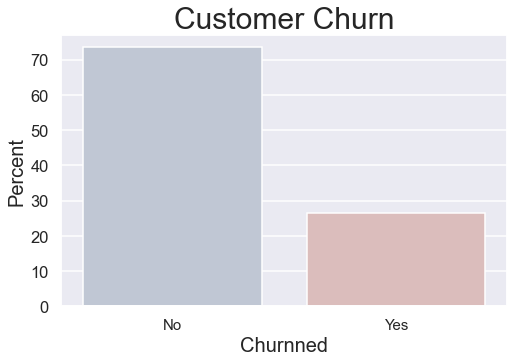

In [54]:
#Plotting target variables
fig, ax = plt.subplots(figsize=(8,5))
churn=pd.DataFrame(df["churn_value"].value_counts())
churn["churn_value"]=percentage_col(churn,"churn_value")
ax=sns.barplot(x=churn.index,y=churn.churn_value,palette="vlag",ci=None)
sns.set('talk')
ax.set_xticklabels(["No","Yes"],rotation=0,fontsize=15)
ax.set_title("Customer Churn",fontsize=30)
ax.set_ylabel("Percent",fontsize=20)
ax.set_xlabel("Churnned",fontsize=20)
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/Target', dpi=300)

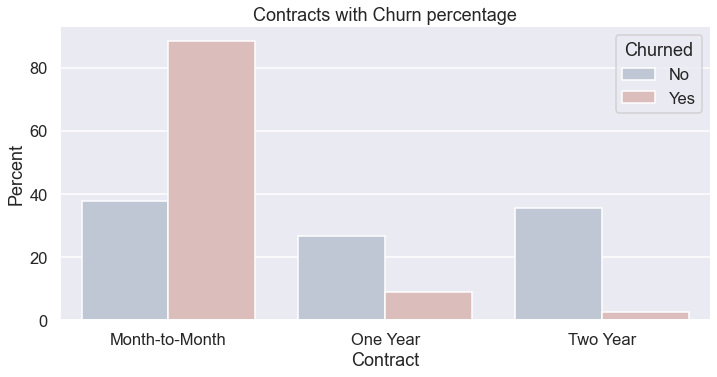

In [71]:
# Plotting the amount of cutomers that there are per contract that the company provides. 
cont=pd.melt(df[["tel_contract","churn_value","zip_code"]].groupby(["tel_contract","churn_value"]).count().T)
cont.value=percentage_col(cont,"value",string=True,churn=True)
cont=cont.rename(columns={'churn_value': 'Churned'})
sns.set('talk')
ax=sns.catplot(x='tel_contract', y='value',aspect=2, hue='Churned', data=cont, kind='bar',palette="vlag", legend_out=False)\
.set(ylabel='Percent', xlabel='Contract', title='Contracts with Churn percentage')
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/contract', dpi=300)

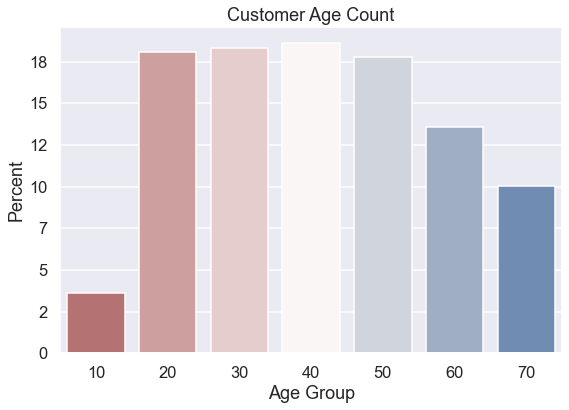

In [63]:
#Plotting each customer age group to get an idea of how many customers there are in each group.
age=pd.melt(df[["age","latitude"]].groupby("age").count().T)
age["value"]=percentage_col(age,"value")
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.barplot(age.age,age.value,palette="vlag_r")
ax.set_xlabel("Age Group")
ax.set_ylabel("Percent")
ax.set_yticklabels(["0","2","5","7","10","12","15","18"])
ax.set_title("Customer Age Count")
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/age_groups', dpi=300)

Text(0.5, 1.0, 'Reason for Churn')

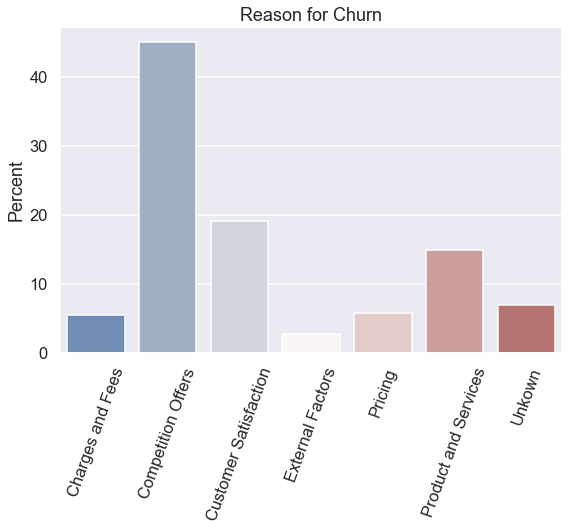

In [52]:
# Plotting reason for why each customer churned.
reason=pd.melt(df[["tel_churn_reason","latitude"]].groupby("tel_churn_reason").count().T).drop(3,axis=0).reset_index(drop=True)
reason["value"]=percentage_col(reason,"value")
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.barplot(x=reason.tel_churn_reason,y=reason.value,palette="vlag")
sns.set('talk')
ax.set_xticklabels(reason.tel_churn_reason,rotation=70)
ax.set_ylabel("Percent")
ax.set_xlabel("")
ax.set_title("Reason for Churn")

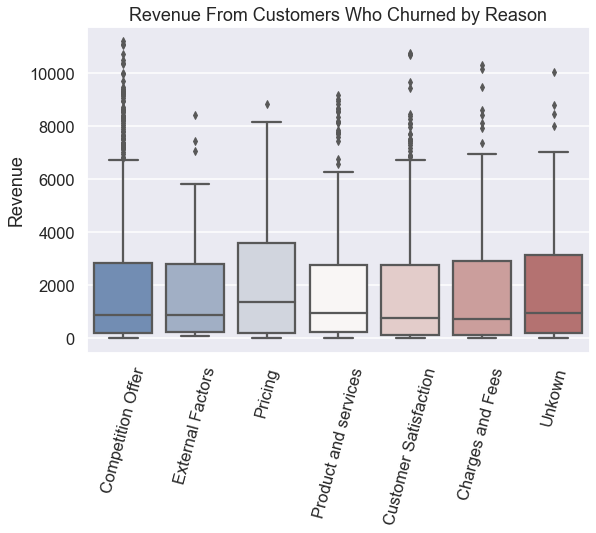

In [56]:
# Plotting the revenue that was lost from the customers that left and why they left. 
fig, ax = plt.subplots(figsize=(9,6))
reasons=df[df["tel_churn_reason"]!="Did Not Churn"][["tel_churn_reason","total_revenue"]]
ax=sns.boxplot(x=reasons.tel_churn_reason,y=reasons.total_revenue,palette="vlag")
sns.set('talk')
ax.set_xticklabels(["Competition Offer","External Factors","Pricing","Product and services","Customer Satisfaction","Charges and Fees","Unkown"],rotation=75)
ax.set_xlabel("")
ax.set_ylabel("Revenue")
ax.set_title("Revenue From Customers Who Churned by Reason")
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/revenue_loss', dpi=300)

Text(0.5, 1.0, 'Revenue by Age')

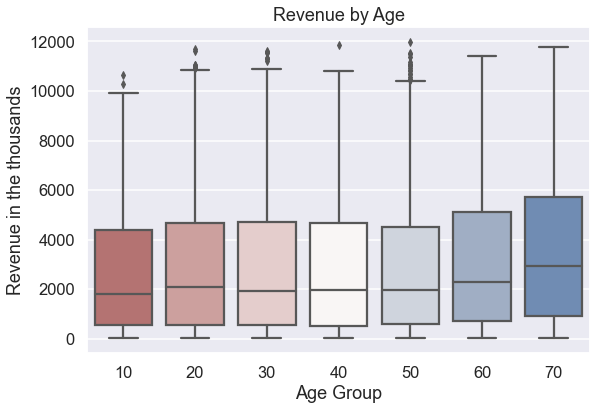

In [64]:
#Plotting how much revenue each age group generates.
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.boxplot(df.age,df.total_revenue,palette="vlag_r")
ax.set_xlabel("Age Group")
ax.set_ylabel("Revenue in the thousands")
ax.set_title("Revenue by Age")

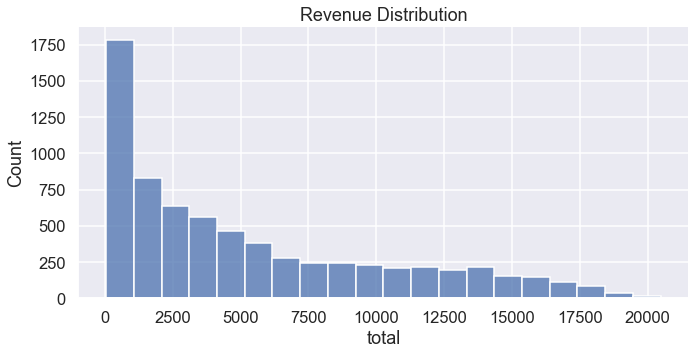

In [87]:
# plotting age revenue distribution.
charge=df[["total_revenue","tel_total_charges"]]
charge["total"]=charge["total_revenue"]+charge["tel_total_charges"]
sns.displot(charge, x="total",bins=20, kind="hist",palette="vlag_r", aspect=2).set(title='Revenue Distribution')
plt.show()

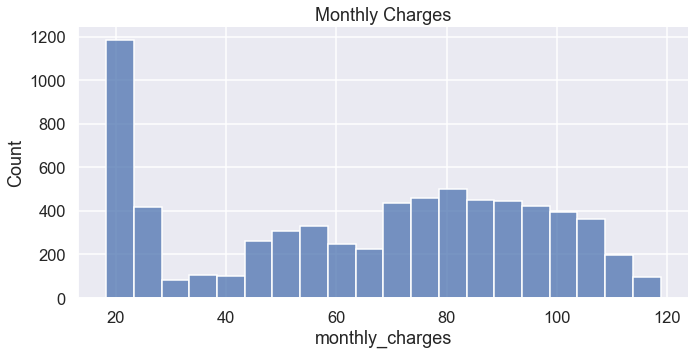

In [88]:
# Plotting monthly charges distribution.
sns.displot(df, x="monthly_charges",bins=20, kind="hist",palette="vlag_r", aspect=2).set(title='Monthly Charges')
plt.show()